In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
# checking unique values

df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
# Checking for duplicates

df.duplicated().sum()

0

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Major challenges with this dataset:

- Datatype conversion
- Missing value ( Data cleaning)
- Nested/ Clubbed Data
#### 1- Datatype conversion-

In [ ]:
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_category'] = df['duration'].str.extract('(\D+)')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,duration_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons


#### Missing Values

- Handling missing values by simply deleting the rows with missing data might seem like an easy option, but it's not conducive to our Exploratory Data Analysis (EDA) since it would result in information loss.
- Given that "director," "cast," and "country" columns have a significant number of null values, we have opted to interpret each missing value as
representing informa tion unavailability.

#### Note:
Considering that the data in the "director," "cast," and "country" columns is non
numeric, traditional imputation methods like mean, median, or mode cannot be applied.

In [ ]:
# Which columns has missing values:

# out of 14 columns, 8 columns have missing value in which:
# categorigcal columns are = director, cast, country, date_added, rating, duration, duration_catogory
# numerical columns are = duration_numerical

In [ ]:
df.isnull().sum()

show_id                 0
type                    0
title                   0
director             2634
cast                  825
country               831
date_added             10
release_year            0
rating                  4
duration                3
listed_in               0
description             0
duration_numeric        3
duration_category       3
dtype: int64

<Axes: >

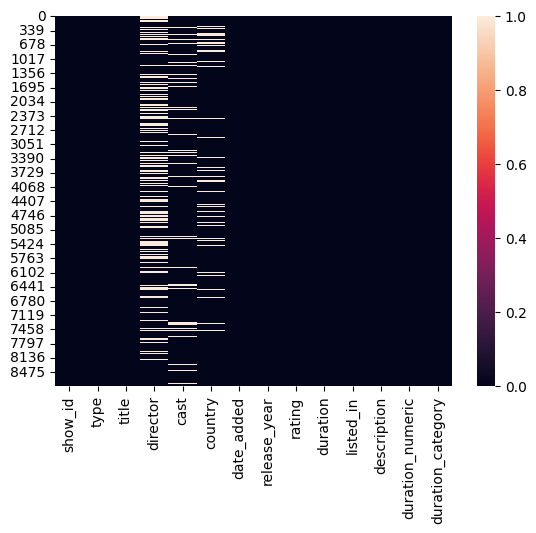

In [ ]:
sns.heatmap(df.isnull())


<Axes: xlabel='type', ylabel='release_year'>

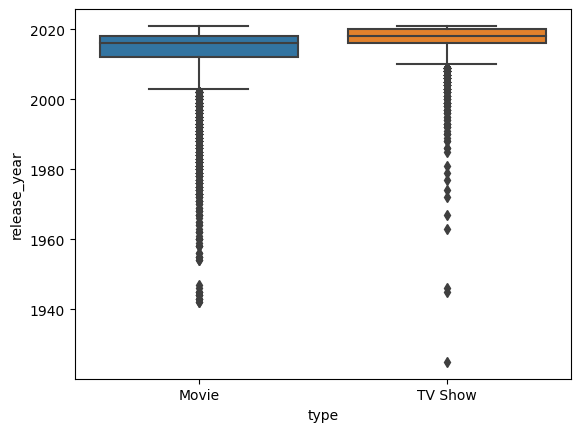

In [ ]:
sns.boxplot(data = df, y= "release_year", x= "type")

This box plot visualizes the distribution of release years for different types of content (movies and TV shows) in the Netflix dataset. Here are some potential insights we can gather from this box plot:

#### Insights:
1. Central Tendency : You can see the median release year for both movies and TV
shows. The line inside each box represents the median, which shows the typical
release year for each type.
2. Outliers: Any individual data points beyond the "whiskers" of the box plot can be
consid ered outliers. These are release years that significantly differ from the majority
of movies or TV shows.

In [ ]:
# Handling missing values in country column

df["country"].replace(np.nan, "No Data", inplace = True)



In [ ]:
# handled missing value in rating, duration, duration numeric, date_added column:

df.dropna(subset = ["rating"], inplace = True)
df.dropna(subset = ["duration" ], inplace = True)
df.dropna(subset = ["duration_numeric" ], inplace = True)
df.dropna(subset = ["date_added" ], inplace = True)


In [ ]:
# replacing missing values in "director" column with "no Data"
df["director"].replace(np.nan, "No Data", inplace = True)


In [ ]:
# replacing missing values in "cast" column with "no Data"


df["cast"].replace(np.nan, "No Data", inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,duration_category,day_added,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min,25,2021,9,
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season,24,2021,9,1
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season,24,2021,9,1
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons,24,2021,9,2


In [ ]:
df.isnull().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
duration_numeric     0
duration_category    0
dtype: int64

In [ ]:
# convert date time format

df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,duration_category,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,25,2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons,24,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season,24,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season,24,2021,9
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons,24,2021,9


In [ ]:
df["duration_numeric"] = df["duration_numeric"].astype(int)


In [ ]:
# Value count for rating

df.value_counts("rating")

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
dtype: int64

### Insights:
1. The dataset shows a diverse range of content ratings, including TV MA for mature
audiences and TV 14 for adolescents.
2. TV MA is the most frequently occurring rating, with 3,207 records. This suggests that
a substantial portion of the content is intended for mature audiences, possibly
containing explicit or adult themes.
3. TV 14 is the second most common rating, with 2,160 records. This rating is often
suitable f or adolescent viewers and may indicate a significant selection of content
suitable for teenagers
4. There are also family friendly options like TV PG, TV Y7, TV Y, and TV G.
5. Ratings like R, PG 13, PG, and G offer content for various age groups.
6. Some entries, like "NR," "UR," "NC 17," and numeric values, may need further
investigation.

In [ ]:
# Value count for duration:

df.value_counts("duration")

duration
1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
201 min         1
200 min         1
196 min         1
43 min          1
10 min          1
Length: 220, dtype: int64

#### Insights:
1. Seasonal Content: The majority of entries in the dataset seem to be TV shows categorized by the number of seasons. "1 Season" is the most common, with 1,793 records. This indicates a substantial collection of single-season TV shows. 2. Variety of Season: There is a diversity of TV show durations, ranging from "1 Season" to "3 Seasons." This variety allows viewers to explore TV series of different lengths. 3. Movie Durations: Entries like "90 min" and "97 min" typically represent the duration of movies in minutes. The presence of various movie durations suggests a selection of movies with different running times. 4. Outliers: Some entries with specific durations like "201 min," "200 min," "196 min," "43 min," and "10 min" appear to be outliers and may require further examination. These durations could represent unusual or potentially erroneous data points.

In [ ]:
# value count for release year:

df.value_counts("release_year")

release_year
2018    1146
2019    1030
2017    1030
2020     953
2016     901
        ... 
1959       1
1961       1
1947       1
1966       1
1925       1
Length: 74, dtype: int64

Insights:
- The dataset primarily consists of recent content, with 2018, 2017, 2019, and 2020 being the most common release years.
- Netflix has maintained a consistent addition of content during the years 2017 to 2020.
- The dataset also includes historical content from earlier decades, offering a diverse viewing experience for a broad audience.

In [ ]:
# unique attributes

df.nunique()

show_id              8790
type                    2
title                8790
director             4527
cast                 7679
country               749
date_added           1713
release_year           74
rating                 14
duration              220
listed_in             513
description          8758
duration_numeric      210
duration_category       3
day_added              31
year_added             14
month_added            12
dtype: int64

#### Insights:
- Content Types: There are two main types, with 8807 records identified as "show_id" and 2 records as "type."
- Diverse Titles: All 8807 entries have unique titles, reflecting a wide variety of content.  Director and Cast: There are 4529 unique directors and 7693 unique cast members, indicating a diverse range of talent in the dataset. - Global Content: Content is sourced from 749 different countries.
- Dates and Years: Date-added information spans 1767 unique dates, and content release years vary across 74 distinct years.
- Content Ratings: There are 17 different content ratings available.
- Varied Durations: Content durations come in 220 different durations.
- Genres: The dataset covers 514 unique genres listed under "listed_in."
- Unique Descriptions: Each entry has a unique description, amounting to 8775 different descriptions in total.

#### Insights:
1. A preliminary examination of the data frame suggests that it resembles a standard
movie/TV show dataset
2. The dataset comprises a total of 8,807 rows distributed across 12 columns.
3. Notably, there is missing data within the dataset, particularly for director, country,
and cast fields.
4. The dataset contains a release year entry for 1925, which can be viewed as an outlier.
5. The data in the dataset spans up to the year 2021.
6. Predominantly, the data set encompasses movies and TV shows released during the
years 2017 to 2020.
7. "Show_id" and "Title" are the distinctive
8. The "Type" and "Rating" columns should be converted to categorical data.
9. The United States has the largest content library available.

### 1- Content Type on Netflix

In [ ]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})
grouped

,type,count
0,Movie,6126
1,TV Show,2664


In [ ]:

fig = px.pie(grouped, values = "count",names = "type",  title="Year Count Plot")
fig.update_layout(title_text='', width= 500, height=500)
fig.show()

#### Insights:
1. Content Distribution : The dataset predominantly consists of movies, with a
substantially higher number of movie records (6,131) compared to TV shows (2,676).
This suggests that Netflix offers a wider va riety of movies than TV shows.
2. Content Strategy : Netflix appears to prioritize movies in its content catalog, possibly
because they have a broader appeal to a wider audience. However, the presence of a
significant number of TV show records (2,676) also suggests a substantial selection of
TV series for viewers.

### 2- Growth in content over the years

In [ ]:
content_counts = df.groupby(['year_added', 'type']).size().reset_index(name='Content Count')
content_counts.head()
fig = px.line(content_counts, x='year_added', y='Content Count', color='type', title='Growth in TV Shows and Movies Over the Years')
fig.show()

bar chart showing the number of TV shows and movies added for each year, making it easy to compare the two categories over time.The growth in number of movies on netflix is much higher than that od TV shows. About 1450 new movies were added in 2018 and growth was down gradually after 2019. The growth in content started from 2013. Netflix kept on adding different movies and tv shows on its platform over the years. This content was of different variety - content from different countries, content which was released over the years.

In [ ]:
# season counting


df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)

### 2 Content added over the years

In [ ]:
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

tv_show_counts = tv_shows['release_year'].value_counts().sort_index()
movie_counts = movies['release_year'].value_counts().sort_index()

all_years = range(df['release_year'].min(), df['release_year'].max() + 1)

tv_show_counts = tv_show_counts.reindex(all_years, fill_value=0)
movie_counts = movie_counts.reindex(all_years, fill_value=0)

df_counts = pd.DataFrame({
    'Year': all_years,
    'TV Shows': tv_show_counts.values,
    'Movies': movie_counts.values
})

fig = px.bar(df_counts, x='Year', y=['TV Shows', 'Movies'],
             labels={'value': 'Count', 'variable': 'Type'},
             title='Number of TV Shows and Movies released Over the Years')
fig.show()

#### Distpot with date_added and release_year for movies and TV shows:

Generate distplot for movies and TV shows concerning their "date_added" and
"release_year" attributes to identify the predominant timeframes when most of these
content types were added and released on Netflix.

<ipython-input-483-d335377e0594>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-483-d335377e0594>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-483-d335377e0594>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to us

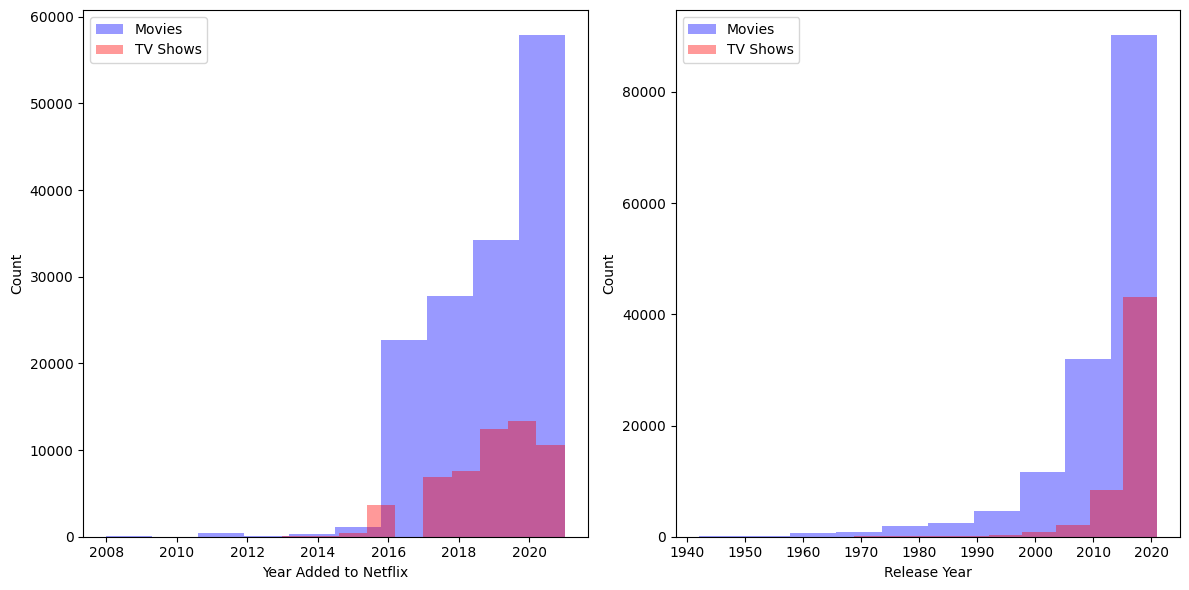

In [ ]:
movies = netflix_df[netflix_df["type"] == "Movie"]
tv_shows = netflix_df[netflix_df["type"] == "TV Show"]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(movies["year_added"], bins=10, kde=False, color="blue", label="Movies")
sns.distplot(tv_shows["year_added"], bins=10, kde=False, color="red", label="TV Shows")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Count")
plt.legend()

plt.subplot(1, 2, 2)
sns.distplot(movies["release_year"], bins=10, kde=False, color="blue", label="Movies")
sns.distplot(tv_shows["release_year"], bins=10, kde=False, color="red", label="TV Shows")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()


### Insights:
- Netflix significantly increased its content library in recent years, especially in 2019 and 2020.
- The majority of content additions occurred from 2017 onwards.
- There is an imbalance in the number of movies and TV shows added each year. -Some TV shows date back to 2008, while movies have a more recent starting point in 2009.

### Boxplot to analyse the duration of movies and TV shows available on Netflix

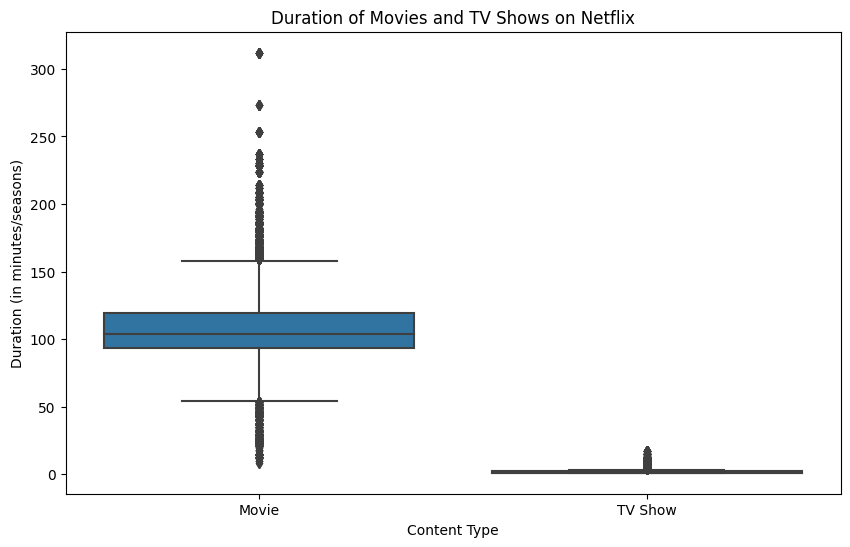

In [ ]:
movies = netflix_df[netflix_df["type"] == "Movie"]
tv_shows = netflix_df[netflix_df["type"] == "TV Show"]
plt.figure(figsize=(10, 6))
sns.boxplot(x="type", y="duration_numeric", data=pd.concat([movies, tv_shows]))
plt.xlabel("Content Type")
plt.ylabel("Duration (in minutes/seasons)")
plt.title("Duration of Movies and TV Shows on Netflix")
plt.show()


### Insights:
1. Movies: Upon examining the box plots for movies and TV shows, we observe that the majority of movies have durations within a reasonable range, with only a few outliers extending to approximately 2.5 hours. This implies that Netflix predominantly offers movies that conform to standard viewing durations.
2. TV Shows: In the case of TV shows, the box plot illustrates that most series consist of one to four seasons, with very few exceptions having longer durations. This reinforces the previous findings, indicating Netflix's emphasis on shorter series formats.

### Distribution of content available in different countries rating wise

<ipython-input-485-c4a0a7922226>:21: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



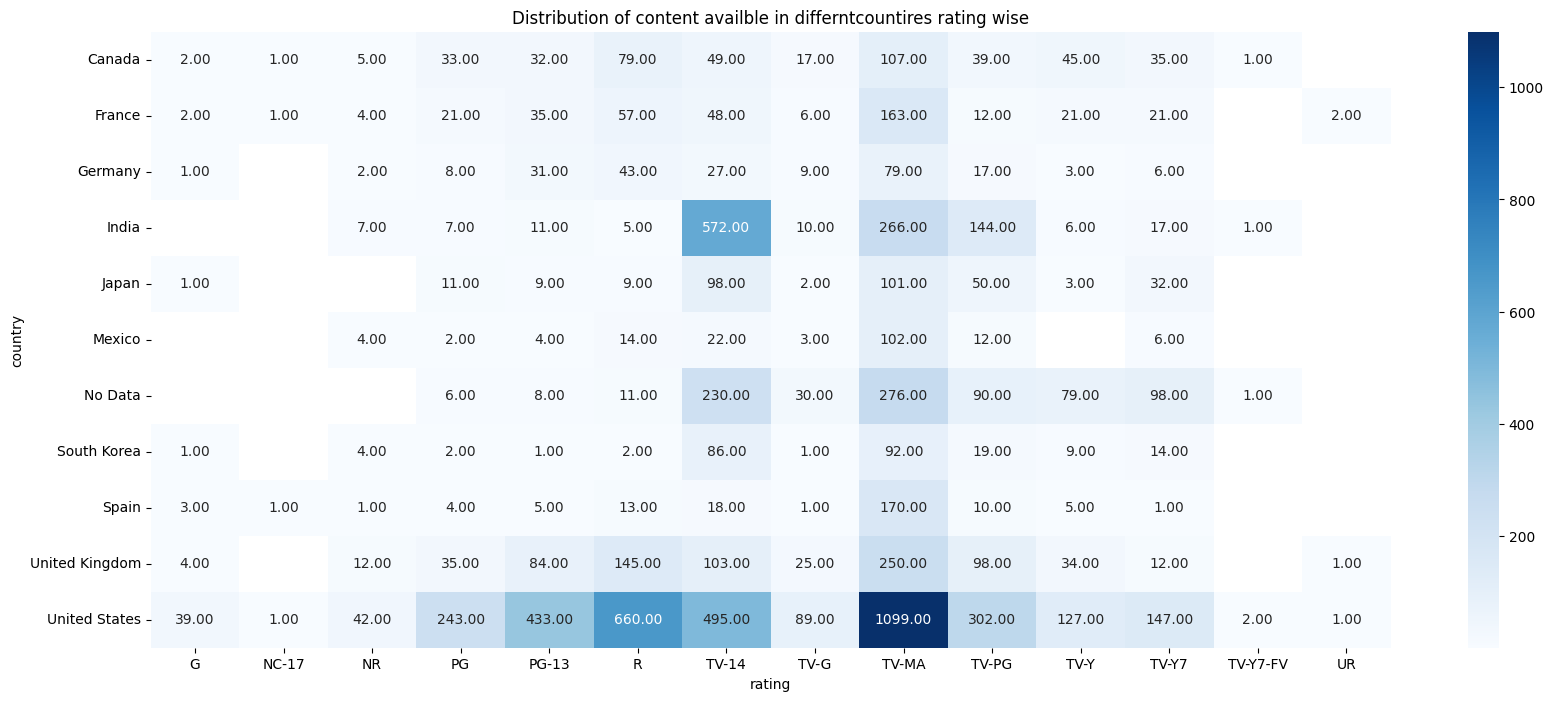

In [ ]:
country = df["country"].apply(lambda x: str(x).split(", ")).tolist()
#exploding the country column
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]

df_trend_country = df.merge(df_country , on = "title")
df_trend_country.drop(columns = "country_x" , inplace = True)
df_trend_country.rename(columns = {"country_y":"country"}, inplace = True)

temp = df_trend_country['country'].value_counts()[:11].reset_index()
temp.rename(columns = {'index':'country', 'country':'count'}, inplace=True)
country_list = temp['country'].tolist()
df_top10country = df_trend_country.loc[df_trend_country['country'].isin(country_list)]
df_top10country = df_top10country.loc[df_top10country["country"]!="nan"] #dropping of rows whose value is unknown.
heat_rating = df_top10country.groupby("country")["rating"].value_counts().reset_index(0)
heat_rating.rename(columns={"rating":"count"}, inplace=True)
heat_rating.reset_index(inplace=True)
heat_rating = heat_rating.pivot("country" , "rating" , "count")
plt.figure(figsize = (20,8))
sns.heatmap(heat_rating, annot = True, cmap="Blues", fmt=".2f")
plt.title("Distribution of content availble in differntcountires rating wise")
plt.show()

### Insights:
- Top 10 Countries and TV-MA Content: The top 10 countries have a significant amount of TV-MA (Adults) content, suitable for mature audiences.
- India and U.S. with TV-14 Content: India and the United States offer a substantial amount of TV-14 content, suitable for viewers aged 14 and older.
- UK and U.S. with R Content: The United Kingdom and the United States have a noteworthy presence of "R" rated content, intended for adult audiences due to strong language, violence, and explicit material.

### In which month, the content is added the most?

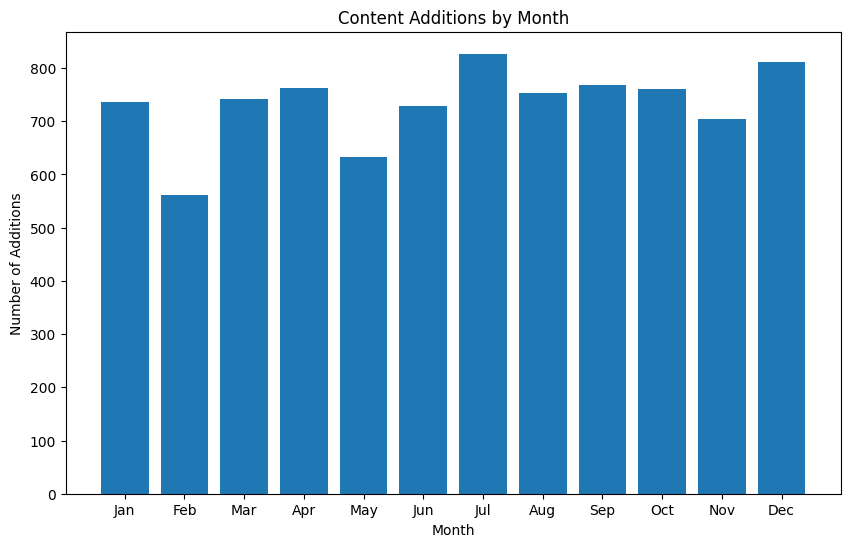

In [ ]:
month_counts = df['month_added'].value_counts().sort_index()

df_counts = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Count': month_counts.values
})

plt.figure(figsize=(10, 6))

plt.bar(df_counts['Month'], df_counts['Count'])

plt.xlabel('Month')
plt.ylabel('Number of Additions')
plt.title('Content Additions by Month')

plt.show()


### 3- Top 20 countries producing most contents:

In [ ]:
df['country'] = df['country'].str.split(', ')
df_explo = df.explode('country')
df_explo.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,duration_category,day_added,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min,25,2021,9,
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season,24,2021,9,1
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season,24,2021,9,1
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons,24,2021,9,2


In [ ]:


country_counts = df_explo['country'].value_counts().head(20).reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.bar(country_counts, x='Country', y='Count', title='Top 20 Countries Producing Most Content')
fig.update_xaxes(categoryorder='total ascending')

fig.show()

## Insights:
1. United States Dominance: The United States is the leading contributor of content on Netflix, with 49,868 titles originating from there. This dominance reflects the significant presence of Hollywood in the global entertainment industry.
2. India's Strong Presence: India is the second-largest contributor, with 22,139 titles. This highlights the growing importance of Indian cinema and television content on the platform, reflecting Netflix's efforts to cater to the Indian market.
3. No Country Provided: A notable portion of the content (11,897 titles) does not specify a country of origin. This might include international co-productions or content with ambiguous origins.
4. European Representation: The United Kingdom, France, Spain, and Germany are well-represented in terms of content production, with thousands of titles each. This showcases the diversity of European content on the platform.
5. Asian Influence: Japan and South Korea also have a significant presence on Netflix, indicating the popularity of Asian content, including anime and K-dramas.
6. Global Reach: The presence of countries like Canada, Mexico, Turkey, Nigeria, Egypt, and China suggests that Netflix aims to offer a diverse range of content from various regions, catering to a global audience.
7. Taiwan's Contribution: Taiwan contributes a substantial number of titles, highlighting the inclusion of Taiwanese cinema and television on the platform.

### 4- top 10 genre/ listed_in:

In [ ]:
df['listed_in'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('listed_in')
df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,duration_category,day_added,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,[United States],2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min,25,2021,9,
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[United States],2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,1,Season,24,2021,9,1


In [ ]:
top_listed_ids = df_exploded['listed_in'].value_counts().reset_index()
top_listed_ids.columns = ['listed_in', 'count']

# Sort the DataFrame by count in descending order
top_listed_ids = top_listed_ids.sort_values(by='count', ascending=False)
fig = px.bar(top_listed_ids.head(10), x='listed_in', y='count', title='Top 10 Genre')
fig.show()

In [ ]:
highest_rating_by_category = df_exploded.groupby('listed_in')['rating'].max().reset_index()
highest_rating_by_category.head()

,listed_in,rating
0,Action & Adventure,UR
1,Anime Features,TV-Y7
2,Anime Series,TV-Y7
3,British TV Shows,TV-Y7
4,Children & Family Movies,TV-Y7-FV


#### Top 10 genre of 10 different countries

<ipython-input-489-5927f21b455b>:23: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



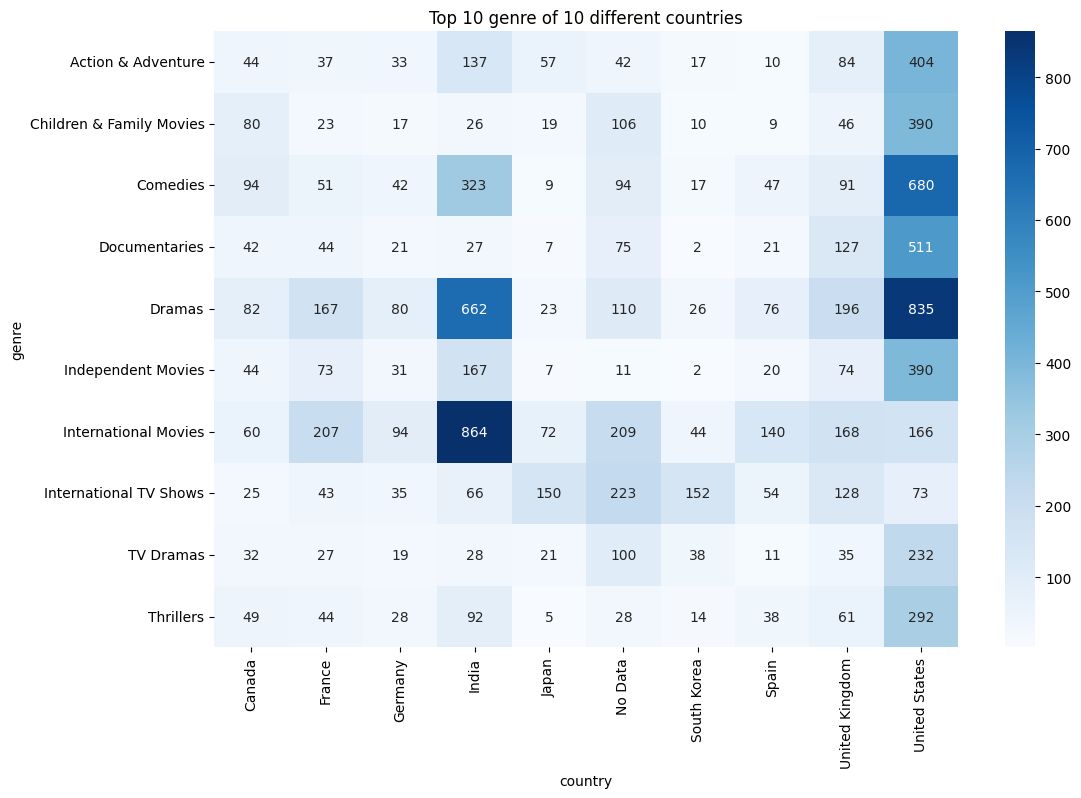

In [ ]:
listed_in = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()
df_genre = pd.DataFrame(listed_in, index = df["title"])
df_genre = df_genre.stack()
df_genre = df_genre.reset_index()
df_genre.drop(columns = "level_1" , inplace = True)
df_genre.columns = ["title" , "genre"]

genre_country_df= df_trend_country.merge(df_genre , on= "title")
temp_genre = genre_country_df['genre'].value_counts()[:10].reset_index()
temp_genre.rename(columns = {'index':'genre', 'genre':'count'}, inplace=True)
genre_list = temp_genre['genre'].tolist()
df_top10_genre = genre_country_df.loc[genre_country_df['genre'].isin(genre_list)]
df_top10_genre = df_top10_genre.loc[df_top10_genre["country"] != "nan"]
df_top10_genre["country"].value_counts()[:10]
temp_c = df_top10_genre["country"].value_counts()[:10].reset_index()
temp_c.rename(columns = {'index':'country', 'country':'count'}, inplace=True)
country_list = temp_c["country"].tolist()
df_top10_genre_countrywise = df_top10_genre.loc[df_top10_genre['country'].isin(country_list)]
df_top10_genre_countrywise.head()
heat_genre= pd.DataFrame(df_top10_genre_countrywise.groupby("genre")["country"].value_counts())
heat_genre.rename(columns = {"country" : "count"}, inplace = True)
heat_genre.reset_index(inplace = True)
heat_genre_final = heat_genre.pivot("genre" , "country" , "count")
plt.figure(figsize = (12,8))
sns.heatmap(heat_genre_final , annot = True, cmap="Blues", fmt = "d")
plt.title("Top 10 genre of 10 different countries")
plt.show()

#### Insights:
- In India, Netflix should expand its library with a focus on international movies, Comedies, and Dramas.
- For the United States, Netflix should prioritize the addition of more content in the Dramas and Comedy genres.
- In Canada, Netflix can enhance its content offerings by emphasizing Dramas and Children & Family movies.

### 5- Rating of movies based on target age

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['ratings_ages'] = df['rating'].map(ratings_ages)

In [ ]:
# plotly code for same analysis



rating_counts = df.groupby(['ratings_ages', 'rating']).size().reset_index(name='count')
fig = px.bar(rating_counts, x='ratings_ages', y='count', color='rating',
             title='Ratings of Movies and TV Shows Based on Target Age Groups',
             labels={'ratings_ages': 'Target Age Group', 'count': 'Count', 'type': 'Type'},
             width=800, height=400)

fig.show()

#### Un- nesting
#### Pre processing of the data:
To perform Exploratory Data Analysis (EDA), it's essential to transform or "unnest" certain
columns such as Actor, Director, Country, Cast, and listed_in for a more granular analysis.
This process allows us to extr act individual components from these columns, providing a
better understanding of the data and enabling more in depth exploration.

In [ ]:
netflix_cast = df.assign(cast=df.cast.str.split(",")).explode("cast").reset_index(drop=True)
netflix_director = netflix_cast.assign(director=netflix_cast.director.str.split(",")).explode("director").reset_index(drop=True)
netflix_country = netflix_director.assign(country=netflix_director.country.str.split(",")).explode("country").reset_index(drop=True)
netflix_df = netflix_country.assign(listed_in=netflix_country.listed_in.str.split(",")).explode("listed_in").reset_index(drop=True)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,duration_category,day_added,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min,25,2021,9,
1,s2,TV Show,Blood & Water,No Data,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
2,s2,TV Show,Blood & Water,No Data,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
3,s2,TV Show,Blood & Water,No Data,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
4,s2,TV Show,Blood & Water,No Data,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2


In [ ]:

df['cast'] = df['cast'].str.split(', ')
df_explo = df.explode('cast')
df = df_explo[df_explo["cast"] != "No Data"]

india_df = df[df["country"] == "India"]

actor_counts_india = india_df.groupby("cast")["show_id"].count().reset_index()

actor_counts_india = actor_counts_india.sort_values(by="show_id", ascending=False)

top_actors_india = actor_counts_india.head(10)

fig_india = px.bar(
    top_actors_india,
    x="show_id",
    y="cast",
    orientation="h",
    labels={"show_id": "Number of Movies", "cast": "Actor"},
    title="Top Actors on Netflix with the Most Movies in India",
)

fig_india.show()

<ipython-input-561-75b6a0151862>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



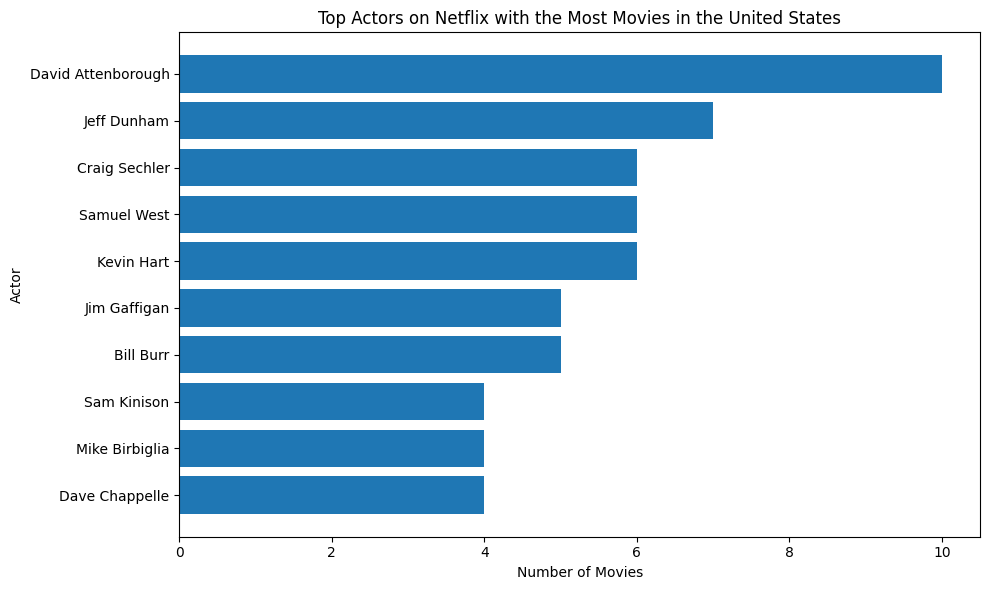

In [ ]:
usa_df = df_explo[df_explo["country"] == "United States"]

usa_df = usa_df[usa_df["cast"] != "No Data"]

actor_counts_usa = usa_df["cast"].value_counts().reset_index()
actor_counts_usa.columns = ["cast", "Number of Movies"]

actor_counts_usa = actor_counts_usa.sort_values(by="Number of Movies", ascending=False)

top_actors_usa = actor_counts_usa.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_actors_usa["cast"], top_actors_usa["Number of Movies"])
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.title("Top Actors on Netflix with the Most Movies in the United States")

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
df['country'] = df['country'].str.split(', ')
df_expl = df.explode('country')
df_expl['cast'] = df_expl['cast'].str.split(', ')
df_explod = df_expl.explode('cast')
df_explod

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,duration_category,day_added,year_added,month_added,season_count
1,s2,TV Show,Blood & Water,No Data,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
1,s2,TV Show,Blood & Water,No Data,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
1,s2,TV Show,Blood & Water,No Data,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
1,s2,TV Show,Blood & Water,No Data,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
1,s2,TV Show,Blood & Water,No Data,Dillon Windvogel,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,min,2,2019,3,
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,min,2,2019,3,
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,min,2,2019,3,
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,min,2,2019,3,


In [ ]:
netflix_df = netflix_df[(netflix_df['country'] != 'No Data') & (netflix_df['cast'] != 'No Data')]
actor_counts = netflix_df.groupby(['country', 'cast'])['show_id'].count().reset_index()
actor_counts['rank'] = actor_counts.groupby('country')['show_id'].rank(ascending=False, method='first')
actor_counts = actor_counts[actor_counts['rank'] <= 2]
top_countries = netflix_df['country'].value_counts().nlargest(10).index.tolist()
top_actor_counts = actor_counts[actor_counts['country'].isin(top_countries)]
top_actor_counts = top_actor_counts.drop(columns=['rank'])

top_actor_counts

,country,cast,show_id
3128,France,Alfred Molina,23
3413,France,Frank Langella,23
9439,United Kingdom,Nicole Kidman,9
9783,United Kingdom,Burgess Meredith,10
10169,United States,Ben Whishaw,12
11014,United States,Jim Broadbent,21
14438,Canada,John Dunsworth,30
14441,Canada,John Paul Tremblay,32
17107,France,Omar Sy,13
17333,France,Wille Lindberg,15


These insights provide an overview of the most prolific actors in each of these countries
based on their appearance count in movies or TV shows. It's interesting to see the variation
in appearance counts between countries, with some actors having significantly more
appearances than others.

#### 7- Genre Distrubution:

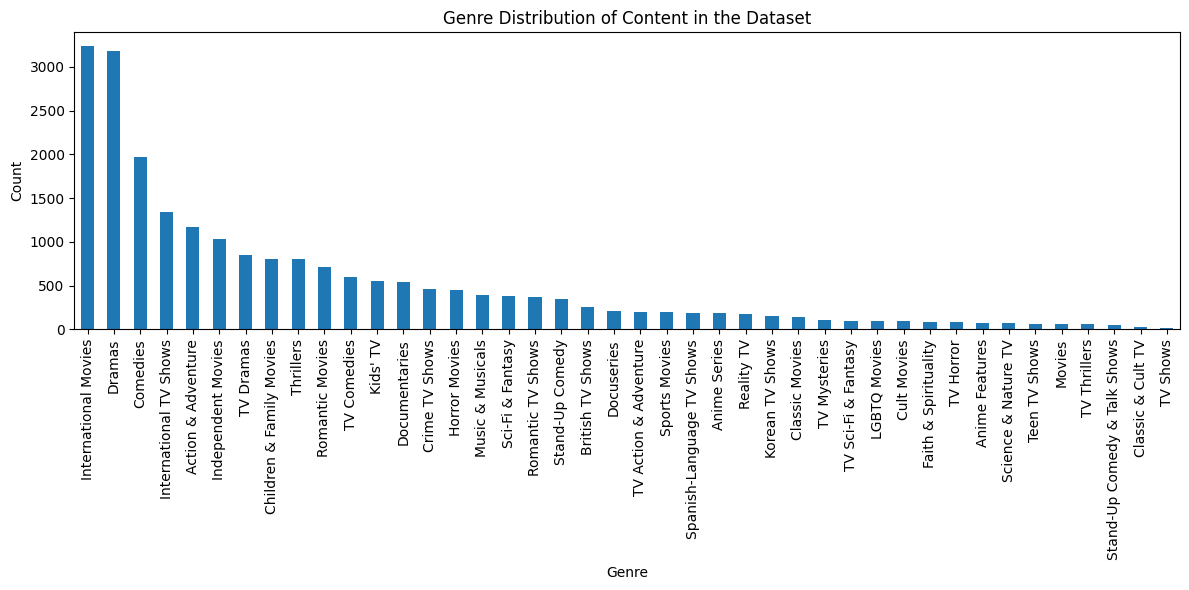

In [ ]:
genres = df['listed_in'].str.split(', ').explode().str.strip()
genre_counts = genres.value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution of Content in the Dataset')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 8- Top Directors and genre relationship:

In [ ]:
df['director'] = df['director'].str.split(', ')
df_expl = df.explode('director')


<ipython-input-521-24e04e915759>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_expl['listed_in'] = df_expl['listed_in'].str.split(', ')
df_explod = df_expl.explode('listed_in')
df_explod.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,duration_category,day_added,year_added,month_added,season_count
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[No Data],2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,1,Season,24,2021,9,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[No Data],2021-09-24,2021,TV-MA,1 Season,International TV Shows,To protect his family from a powerful drug lor...,1,Season,24,2021,9,1


In [ ]:
#plotly code

df = df_explod[df_explod["director"] != "No Data"]

director_genre_counts = df.groupby(['director', 'listed_in'])['show_id'].count().reset_index()

top_directors = director_genre_counts.groupby('director')['show_id'].sum().nlargest(10).index

top_director_genre_counts = director_genre_counts[director_genre_counts['director'].isin(top_directors)]

fig = px.bar(
    top_director_genre_counts,
    x='director',
    y='show_id',
    color='listed_in',
    labels={'director': 'Director', 'show_id': 'Number of Shows', 'listed_in': 'Genre'},
    title='Top 10 Directors and Genre Relationship',
)

fig.show()

Netflix can identify which genres are favored by top directors. This insight can help them collaborate with these directors to produce content that aligns with their strengths and preferences. This leading to higher-quality productions.

#### 9- Countries with most content availability by type:

In [ ]:
# plotly code



country_type_counts = df_explod.groupby(['country', 'type'])['show_id'].count().reset_index()

top_10_countries = country_type_counts.groupby('country')['show_id'].sum().nlargest(10).index
filtered_counts = country_type_counts[country_type_counts['country'].isin(top_10_countries)]

fig = px.imshow(
    filtered_counts.pivot(index='type', columns='country', values='show_id'),
    labels={'color': 'Number of Shows'},
    x=filtered_counts['country'].unique(),
    y=filtered_counts['type'].unique(),
    color_continuous_scale='Viridis',
    title='Top 10 Countries with Most Content Availability by Type',
)

fig.show()

Netflix can identify which type of content is more prevalent in each country. By analyzing the heatmap, Netflix can tailor its content strategy for each country. For example, if a particular country prefers movies over TV shows, Netflix can prioritize movie production for that market. If certain content types are in high demand in specific countries, Netflix can consider entering those markets and offering content that aligns with local preferences.

#### 10 - Distribution of content by genre in different countries:

In [ ]:
df['country'] = df['country'].str.split(', ')
df_expl = df.explode('country')
df_expl['listed_in'] = df_expl['listed_in'].str.split(', ')
df_explod = df_expl.explode('listed_in')
df_explod.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,duration_category,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min,25,2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,1,Season,24,2021,9


In [ ]:
genre_country_counts = df_explod.groupby(['country', 'listed_in']).size().reset_index(name='count')

pivot_table = genre_country_counts.pivot(index='listed_in', columns='country', values='count')

fig = px.imshow(pivot_table,
                labels=dict(x="Country", y="Genre", color="Count"),
                x=pivot_table.columns,
                y=pivot_table.index,
                color_continuous_scale="Viridis",
                title="Distribution of Content by Genre in Different Countries",
               )

fig.update_xaxes(side="top")
fig.update_layout(xaxis=dict(tickangle=-70))

fig.show()

If specific genres are more popular in certain countries or regions, Netflix can use this data to tailor content for local markets and enhance its global expansion strategy. Understanding the content preferences of different countries can help Netflix cater to local audience tastes. For instance, if comedy movies are popular in one country, Netflix can produce more comedies to attract viewers in that region.


#### 11- Director with Highest Content Type Count in Each Country

In [ ]:
df['country'] = df['country'].str.split(', ')
df_expl = df.explode('country')
df_expl['director'] = df_expl['director'].str.split(', ')
df_explod = df_expl.explode('director')
df_explod.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,duration_category,day_added,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min,25,2021,9,
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,24,2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season,24,2021,9,1
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season,24,2021,9,1
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons,24,2021,9,2


In [ ]:
df = df_explod[df_explod['director'] != 'No Data']

director_country_counts = df.groupby(['country', 'director']).size().reset_index(name='content_count')

top_director_in_each_country = director_country_counts.groupby('country').apply(lambda x: x.loc[x['content_count'].idxmax()]).reset_index(drop=True)

fig = px.bar(
    top_director_in_each_country,
    x='country',
    y='content_count',
    color='director',
    labels={'content_count': 'Content Type Count'},
    title='Director with Highest Content Type Count in Each Country',
)

fig.show()

Netflix can identify directors who have a significant presence in specific countries. These directors may have a strong influence on the local film industry and viewer preferences.


### Top 2 Director in top 10 country

In [ ]:
df = df_explod[(df_explod['director'] != 'No Data') | (df_explod['cast'] != 'No Data')]

# Get the top 5 countries with the most shows.
top_countries = df['country'].value_counts().nlargest(5).index.tolist()

# Filter the data to include only the top 5 countries.
df_top_countries = df[df['country'].isin(top_countries)]

# Group the data by country and director, then count the number of shows each director has directed.
director_counts = df_top_countries.groupby(['country', 'director'])['show_id'].count().reset_index()

# Sort the director counts in descending order for each country.
director_counts['rank'] = director_counts.groupby('country')['show_id'].rank(ascending=False, method='first')
director_counts = director_counts[director_counts['rank'] <= 2]
director_counts = director_counts.drop(columns=['rank'])


# Display the top 2 directors for each of the top 5 countries.
director_counts

,country,director,show_id
175,Canada,Mike Clattenburg,48
210,Canada,Robert Vince,48
500,France,Thierry Donard,33
521,France,Youssef Chahine,35
667,India,David Dhawan,90
1098,India,Sooraj R. Barjatya,60
1460,United Kingdom,Martin Campbell,35
1567,United Kingdom,Sarah Smith,44
2762,United States,Martin Scorsese,139
3292,United States,Steven Spielberg,121


### Business Insights
Here are the business insights based on the provided data:
1. Content Distribution: Netflix predominantly offers movies, with a significantly higher number of movie records compared to TV shows. This suggests a wider variety of movies in its catalog.
2. Content Strategy: Netflix seems to prioritize movies in its content catalog, possibly due to their broader appeal. However, there's also a substantial selection of TV series available.
3. Content Ratings: A diverse range of content ratings, including TV-MA for mature audiences and TV-14 for adolescents, indicates a broad audience catered to. TV-MA is the most common rating, suggesting a substantial portion of mature-themed content. TV-14 is also prevalent, indicating content suitable for teenagers.
4. Seasonal Content: TV shows are primarily categorized by seasons, with single-season shows being the most common. A variety of show durations allows viewers to explore TV series of different lengths.
5. Movie Durations: Movies have various durations, with some outliers that may need further investigation.
6. Release Years: Netflix primarily offers recent content, with the most common release years being 2018, 2017, 2019, and 2020.
7. Content Types: Most records belong to movies, reflecting a focus on movie content.
8. Global Content: Content is sourced from 749 different countries, indicating a diverse range of international content.
9. Unique Titles: Each entry has a unique title, showcasing a wide variety of content.
10. Director and Cast: The dataset contains a diverse range of directors and cast members.
11. Content Ratings and Durations: There's a variety of content ratings, durations, genres, and descriptions, offering a diverse viewing experience.
12. Content Growth: Netflix significantly increased its content library in recent years, especially in 2019 and 2020.
13. Content Variety: The platform offers a wide range of genres, with International Movies, Dramas, and Comedies being the most popular.
14. Director Diversity: Directors from different countries and backgrounds contribute to the content, highlighting the global nature of the film industry.
15. Country Contributions: The United States and India are major contributors, but content comes from various countries worldwide.
16. COVID-19 Impact: A significant drop in movie additions in 2021 may be attributed to the COVID-19 pandemic's impact on content production.
17. Content Duration: Netflix focuses on standard movie durations and shorter TV series formats.
18. Content Ratings by Country: Different countries have varying preferences for content ratings, suggesting a need for regional content strategies.
These insights provide a comprehensive understanding of Netflix's content strategy, diversity, and audience targeting, helping inform future content acquisition and platform growth.


### Recommendations
Based on the insights derived from the data, here are some key recommendations for netflix:
1. Content Diversity and Balance:Content Diversity and Balance: Continue to offer a diverse range of content, Continue to offer a diverse range of content, balancing both movies and TV shows to cater to a broad audience.balancing both movies and TV shows to cater to a broad audience.
2. Content Strategy:Content Strategy: Maintain a focus on movies due to their broad appeal but continue Maintain a focus on movies due to their broad appeal but continue to invest in TV series, to invest in TV series, especially considering the growing popularity of bingeespecially considering the growing popularity of binge--watching.watching.
3. Content Ratings:Content Ratings: Ensure a balanced mix of content ratings to cater to audiences of all Ensure a balanced mix of content ratings to cater to audiences of all ages and preferences.ages and preferences.
4. Content Duration:Content Duration: Strategically curate content durations, offering both standardStrategically curate content durations, offering both standard--llength movies and TV series with varying numbers of seasons.ength movies and TV series with varying numbers of seasons.
5. Release Years: Release Years: Keep adding recent content to stay competitive, but also consider the Keep adding recent content to stay competitive, but also consider the value of historical and classic content.value of historical and classic content.
6. Global Reach:Global Reach: Continue to source content from a wide range of countrieContinue to source content from a wide range of countries to provide s to provide an international and culturally diverse viewing experience.an international and culturally diverse viewing experience.
7. Content Quality:Content Quality: Focus on content quality by collaborating with renowned directors Focus on content quality by collaborating with renowned directors and cast members.and cast members.
8. Regional Strategies:Regional Strategies: Tailor content strategies for specific regions based on theirTailor content strategies for specific regions based on their preferences, as evidenced by content ratings and genres.preferences, as evidenced by content ratings and genres.
9. COVIDCOVID--19 Impact:19 Impact: Monitor and adapt to the evolving impact of external factors, such Monitor and adapt to the evolving impact of external factors, such as the COVIDas the COVID--19 pandemic, on content production and release schedules.19 pandemic, on content production and release schedules.
10. User Experience:User Experience: Enhance user experience byEnhance user experience by ensuring a wellensuring a well--structured content structured content library with accurate descriptions and recommendations.library with accurate descriptions and recommendations.
11. DataData--Driven Decisions:Driven Decisions: Continue to use data analytics to inform content acquisition Continue to use data analytics to inform content acquisition decisions and personalize recommendations for viewers.decisions and personalize recommendations for viewers.
12.Content Growth:Content Growth: Maintain Maintain a consistent and strategic approach to content growth, a consistent and strategic approach to content growth, aligning with market trends and viewer demands.aligning with market trends and viewer demands.